###  print out structures

In [5]:
import random
import numpy as np
import pprint

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)

#### 1 Layer with 3 neurons, 1 output

Layer:  Layer of [LinearNeuron(3)]
Neurons:  [LinearNeuron(3)]
[Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.1, grad=0), Value(name=val2,neuronnumber=n1,weightnumber=,type=w2,data=0.2, grad=0), Value(name=val3,neuronnumber=n1,weightnumber=,type=w3,data=0.30000000000000004, grad=0), Value(name=val4,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0)]
parameters
[   Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.1, grad=0),
    Value(name=val2,neuronnumber=n1,weightnumber=,type=w2,data=0.2, grad=0),
    Value(name=val3,neuronnumber=n1,weightnumber=,type=w3,data=0.30000000000000004, grad=0),
    Value(name=val4,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0)]
inputs  [Value(name=val5,neuronnumber=,weightnumber=,type=i,data=1, grad=0), Value(name=val6,neuronnumber=,weightnumber=,type=i,data=2, grad=0), Value(name=val7,neuronnumber=,weightnumber=,type=i,data=3, grad=0)]
number of Value objects created =  13
activation:  Value(name=val13,neuronnumber=n1,we

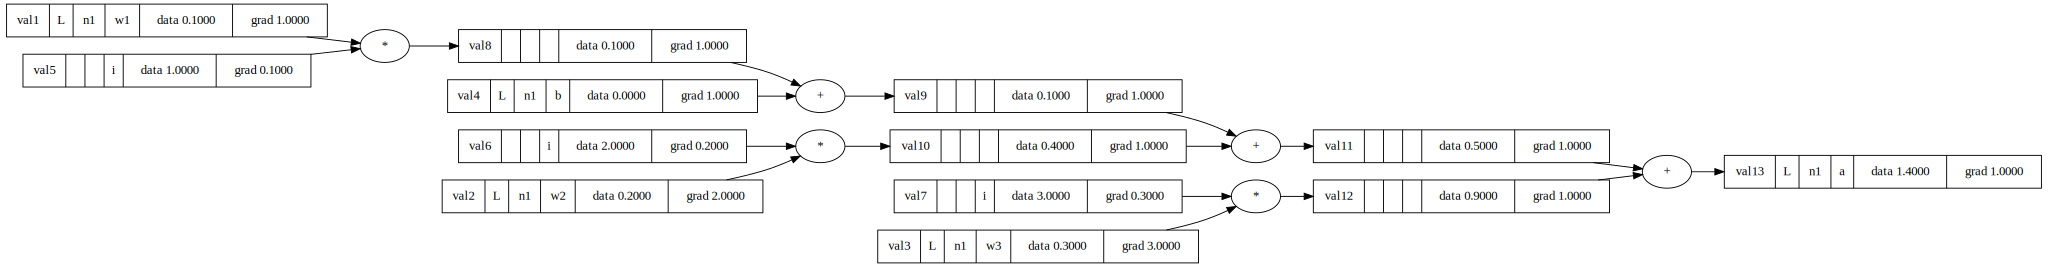

In [6]:
nin=3  #number of inputs
nout=1  #number of outputs
nonlin=False
Value.value_counter=0

myLayer=Layer(nin,nout,nonlin=nonlin, weightsinit=1)
print("Layer: ",myLayer)
print("Neurons: ",myLayer.neurons)
print(myLayer.parameters())
print("parameters")
pp.pprint(myLayer.parameters())

# xinumbers= np.random.randint(1,10, size=(nin))   # inputs
xinumbers = list(range(1, nin+1))
xinput = [Value(x,type='i') for x in xinumbers]
print("inputs ", xinput)

activation=myLayer(xinput)
activation.backward()

print("number of Value objects created = ",Value.value_counter)

print("activation: ",activation)
draw_dot(activation)

#### 1 Layer with 2 inputs, 2 neurons, 2 outputs

Layer:  Layer of [LinearNeuron(2), LinearNeuron(2)]
parameters
[   Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.6000000000000001, grad=0),
    Value(name=val2,neuronnumber=n1,weightnumber=,type=w2,data=1.2000000000000002, grad=0),
    Value(name=val3,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0),
    Value(name=val4,neuronnumber=n2,weightnumber=,type=w1,data=0.30000000000000004, grad=0),
    Value(name=val5,neuronnumber=n2,weightnumber=,type=w2,data=0.6000000000000001, grad=0),
    Value(name=val6,neuronnumber=n2,weightnumber=,type=b,data=0, grad=0)]
inputs
[   Value(name=val7,neuronnumber=,weightnumber=,type=i,data=1, grad=0),
    Value(name=val8,neuronnumber=,weightnumber=,type=i,data=2, grad=0)]
activation
[   Value(name=val12,neuronnumber=n1,weightnumber=,type=a,data=3.0000000000000004, grad=0),
    Value(name=val16,neuronnumber=n2,weightnumber=,type=a,data=1.5000000000000002, grad=0)]
number of Value objects created =  16
desired outputs 
[   Value(name=val1

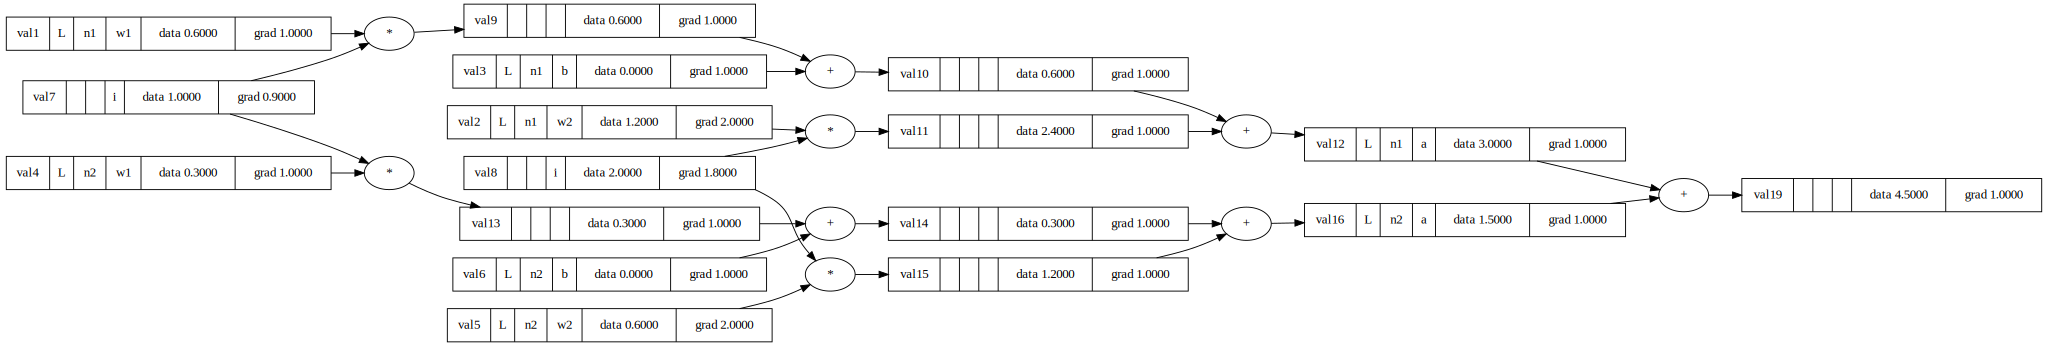

In [14]:
nin = 2  # number of inputs
nout = 2  # number of outputs
nonlin = False
Value.value_counter = 0

myLayer = Layer(nin, nout, nonlin=nonlin, weightsinit=2)
print("Layer: ", myLayer)
# print("Neurons: ",myLayer.neurons)
print("parameters")
pp.pprint(myLayer.parameters())

# xinumbers= np.random.randint(1,10, size=(nin))   # inputs
xinumbers = list(range(1, nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs")
pp.pprint(xinput)

activation = myLayer(xinput)
print("activation")
pp.pprint(activation)

# activation[0].backward()

print("number of Value objects created = ", Value.value_counter)

# draw_dot(activation[0])
# activation[1].backward()
# draw_dot(activation[1])

ys = [1.2, 1.3]  # desired targets
xtarget = [Value(x, type="t") for x in ys]
print("desired outputs ")
pp.pprint(xtarget)

# loss = sum((yout - ygt) ** 2 for ygt, yout in zip(activation, xtarget))
loss = activation[1] + activation[0]
loss.backward()
print("number of Value objects created = ", Value.value_counter)

draw_dot(loss)